In [109]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline



In [110]:
df = pd.read_csv('review_scrape_50.csv', header=0)

In [111]:
df.columns

Index(['title', 'Date', 'UserID ', 'All Review ', 'Reviews', 'Location Rating',
       'Rooms Rating', 'Service Rating', 'stars', 'Owner Response Date',
       'Owner Response'],
      dtype='object')

In [112]:
df = df.drop('All Review ', axis=1)

In [113]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response
0,New York Marriott Downtown,6/6/25 12:13,70209,NaN,NaN,NaN,NaN,4,NaN,NaN
1,New York Marriott Downtown,5/30/25 23:12,45412,NaN,5.0,4.0,5.0,5,NaN,NaN
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN
698,New York Marriott Marquis,5/22/25 8:11,19142,NaN,5.0,5.0,4.0,5,NaN,NaN


In [114]:
def get_brand(title):
    title_lower = str(title).lower()
    if 'w new york' in title_lower:
        return 'Marriott'
    elif 'marriott' in title_lower:
        return 'Marriott'
    elif 'intercontinental' in title_lower:
        return 'IHG'
    elif 'hilton' in title_lower:
        return 'Hilton'
    elif 'hyatt' in title_lower:
        return 'Hyatt'
    elif 'sofitel' in title_lower:
        return 'Accor'
    elif 'indigo' in title_lower:
        return 'IHG'
    elif 'sheraton' in title_lower:
        return 'Marriott'
    elif 'warwick' in title_lower:
        return 'Warwick'
    else:
        return ''

df['Brand'] = df['title'].apply(get_brand)

In [115]:
df = df.dropna(subset=["Reviews"])

In [116]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott
...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott


In [117]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

In [118]:
sentiment_df = df["Reviews"].apply(get_sentiment_scores).apply(pd.Series)

In [119]:
sentiment_df

,neg,neu,pos,compound
2,0.049,0.855,0.096,0.4215
3,0.000,0.474,0.526,0.9231
4,0.000,0.316,0.684,0.8650
5,0.088,0.912,0.000,-0.3404
9,0.212,0.788,0.000,-0.8658
...,...,...,...,...
694,0.000,0.371,0.629,0.8588
695,0.188,0.679,0.133,-0.3094
696,0.000,0.594,0.406,0.6249
697,0.000,0.586,0.414,0.7946


In [120]:
df = pd.concat([df, sentiment_df], axis=1)
df = df.rename(columns={
    'neg': 'Negative',
    'neu': 'Neutral',
    'pos': 'Positive',
    'compound': 'Compound'
})

In [121]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott,0.049,0.855,0.096,0.4215
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.474,0.526,0.9231
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.316,0.684,0.8650
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott,0.088,0.912,0.000,-0.3404
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott,0.212,0.788,0.000,-0.8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.371,0.629,0.8588
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott,0.188,0.679,0.133,-0.3094
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.594,0.406,0.6249
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.586,0.414,0.7946


In [122]:
df.to_csv('hotel_reviews_with_sentiment.csv', index=False)

In [123]:
avg_sentiment_by_hotel = df.groupby("title")["Compound"].mean().reset_index()
avg_sentiment_by_hotel = avg_sentiment_by_hotel.sort_values(by="Compound", ascending=False)

In [124]:
avg_sentiment_by_hotel

,title,Compound
6,"InterContinental New York Times Square, an IHG...",0.762249
5,InterContinental New York Barclay by IHG,0.610273
7,"Marriott Vacation Club, New York City",0.607443
12,W New York - Times Square,0.548073
13,Warwick New York,0.539661
2,Hotel Indigo Lower East Side New York by IHG,0.497142
0,"Dream Downtown, by Hyatt",0.445130
8,New York Marriott Downtown,0.429655
11,Sofitel New York,0.421361
3,Hyatt Grand Central New York,0.378962


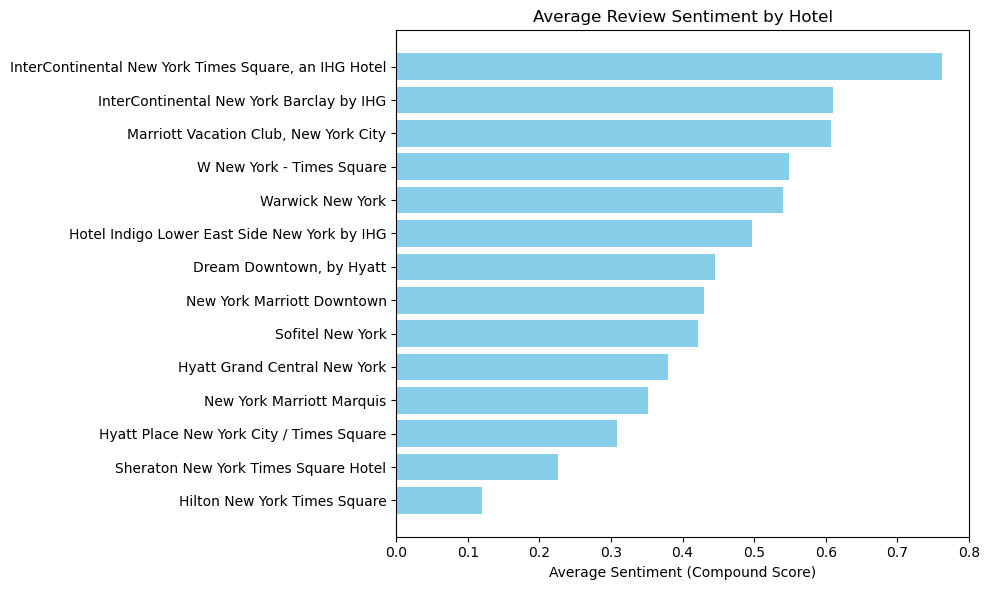

In [125]:
plt.figure(figsize=(10, 6))
plt.barh(avg_sentiment_by_hotel["title"], avg_sentiment_by_hotel["Compound"], color="skyblue")
plt.xlabel("Average Sentiment (Compound Score)")
plt.title("Average Review Sentiment by Hotel")
plt.gca().invert_yaxis()  # Most positive at the top
plt.tight_layout()
plt.show()

In [126]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott,0.049,0.855,0.096,0.4215
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.474,0.526,0.9231
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.316,0.684,0.8650
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott,0.088,0.912,0.000,-0.3404
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott,0.212,0.788,0.000,-0.8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.371,0.629,0.8588
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott,0.188,0.679,0.133,-0.3094
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.594,0.406,0.6249
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.586,0.414,0.7946


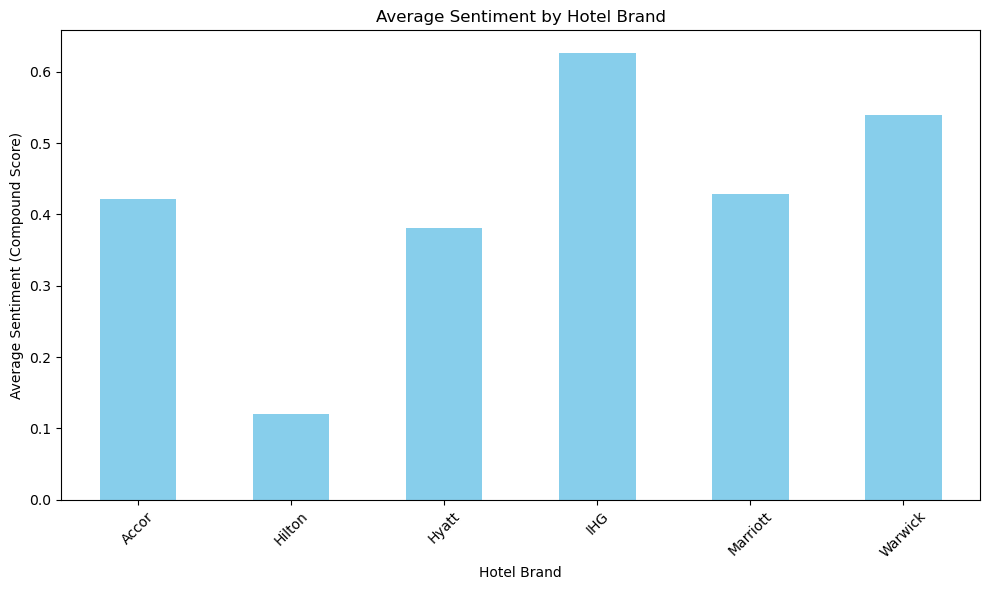

In [127]:
mean_sentiment = df.groupby('Brand')['Compound'].mean()
plt.figure(figsize=(10, 6))
mean_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Average Sentiment (Compound Score)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

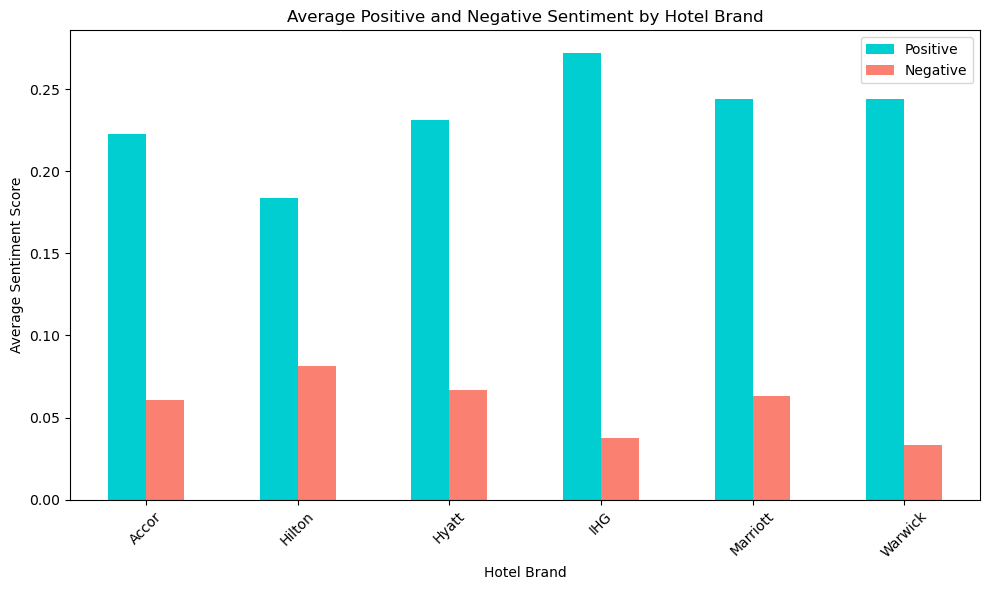

In [128]:
mean_pos_neg = df.groupby('Brand')[['Positive', 'Negative']].mean()
mean_pos_neg.plot(kind='bar', stacked=False, figsize=(10, 6), color=['darkturquoise', 'salmon'])
plt.title('Average Positive and Negative Sentiment by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [129]:
# Filter Marriott reviews only
marriott_df = df[df['title'].str.contains("Marriott", case=False, na=False)].copy()

In [130]:
# Define thresholds for high and low sentiment
high_sentiment = marriott_df[marriott_df['Compound'] >= 0.5]
low_sentiment = marriott_df[marriott_df['Compound'] <= -0.1]

In [131]:
high_sentiment

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.474,0.526,0.9231
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.316,0.684,0.8650
12,New York Marriott Downtown,5/5/25 20:15,40403,decent hotel in downtown manhattan with good r...,NaN,NaN,NaN,3,NaN,NaN,Marriott,0.040,0.862,0.098,0.7992
13,New York Marriott Downtown,5/5/25 6:14,53734,the hotel is a bit old but well maintained and...,5.0,4.0,5.0,4,NaN,NaN,Marriott,0.000,0.664,0.336,0.9209
16,New York Marriott Downtown,5/4/25 9:53,29390,rooms are very dark. comfortable bed.,5.0,2.0,3.0,3,NaN,NaN,Marriott,0.000,0.583,0.417,0.5542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,New York Marriott Marquis,5/23/25 19:37,93406,cool hotel - nyc classic! was there for an eve...,NaN,NaN,NaN,5,NaN,NaN,Marriott,0.000,0.732,0.268,0.6696
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.371,0.629,0.8588
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.594,0.406,0.6249
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.586,0.414,0.7946


In [132]:
def generate_tfidf_wordclouds(df_positive, df_negative, text_column, max_features=100):
    # Combine all reviews for consistent vectorizer fitting
    all_reviews = pd.concat([
        df_positive[text_column].dropna(),
        df_negative[text_column].dropna()
    ])
    
    # Create and fit vectorizer on entire dataset
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    vectorizer.fit(all_reviews)  # Fit once on all data
    
    # Transform both review sets using the same vectorizer
    tfidf_pos = vectorizer.transform(df_positive[text_column].dropna())
    tfidf_neg = vectorizer.transform(df_negative[text_column].dropna())
    
    # Calculate scores (same as before)
    pos_scores = np.asarray(tfidf_pos.sum(axis=0)).flatten()
    neg_scores = np.asarray(tfidf_neg.sum(axis=0)).flatten()
    
    # Create word frequency dictionaries
    pos_words = dict(zip(vectorizer.get_feature_names_out(), pos_scores))
    neg_words = dict(zip(vectorizer.get_feature_names_out(), neg_scores))
    
    # Generate word clouds with improved contrast
    pos_wc = WordCloud(
        width=800, height=400, 
        background_color='white',
        colormap='viridis'  # More readable than default
    ).generate_from_frequencies(pos_words)
    
    neg_wc = WordCloud(
        width=800, height=400,
        background_color='white',  # Better contrast than black
        colormap='Reds_r'  # Reversed red scale
    ).generate_from_frequencies(neg_words)
    
    # Plot with dynamic titles
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    ax1.imshow(pos_wc, interpolation='bilinear')
    ax1.set_title("Positive Reviews TF-IDF Word Cloud", fontsize=14)
    ax1.axis('off')
    
    ax2.imshow(neg_wc, interpolation='bilinear')
    ax2.set_title("Negative Reviews TF-IDF Word Cloud", fontsize=14)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()